# Assignment 1

Please, answer the question by entering runable python code into the cells. Add comments at the beginning of each cell which list the packages that need to be installed (e.g., pip install collections). Run the code so that the output is visible in the notbook before you submit. The data files which you download should lie in the same directory as the python notebooks (use relative paths!). Use python 3.


Submit the notebook (as .ipynb and .pdf) via email to clwagner@uni-koblenz.de until <font color="red">12.5.2017 (midnight CET)</font>.
Subject of email: "CSS2017 ass 1"

Filename: firstname_lastname_ass1.ipynb 


## Analyzing Affiliation Networks and Social Networks (15 Points)

Download the following 2 datasets about the location-based social networking service Brightkite: http://snap.stanford.edu/data/loc-brightkite.html

One of the dataset contains all checkins between April 2008 and October 2010 (4.5 Mio checkins).

Beside the checkin data that constitute an affiliation network (two-mode network of users and locations), there is also a social network included  - i.e., a one-mode netowkr of users. It is an undirected one-mode network.



#### Location Popularity

Count the number of distinct brightkite users who checked-in at each location (using python!). What are the top 10 locations---i.e., the locations where most users checked in? Plot the rank ordered frequency distributions of locations (x-axis: locations ranked by the number of distinct users, y-axis: number of distinct users). <font color="red">(2 Points)</font>


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy as sc
from scipy import stats
from networkx.algorithms import bipartite
import math
import matplotlib.pyplot as plt

In [2]:
checkins = pd.read_csv("Brightkite_totalCheckins.txt",sep="\t", names=['user', 'time', 'lat','long','location_id'])
checkins.head()

,user,time,lat,long,location_id
0,0,2010-10-17T01:48:53Z,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5
1,0,2010-10-16T06:02:04Z,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2
2,0,2010-10-16T03:48:54Z,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79
3,0,2010-10-14T18:25:51Z,39.750469,-104.999073,9848afcc62e500a01cf6fbf24b797732f8963683
4,0,2010-10-14T00:21:47Z,39.752713,-104.996337,2ef143e12038c870038df53e0478cefc


In [3]:
top10 = checkins.groupby(['location_id'])['user'].nunique().sort_values(ascending=False)[:10]
checkins_ranked = checkins.groupby(['location_id'])['user'].nunique().sort_values(ascending=False)
# listing out top 10 locations by number of checkins by unique users
top10

location_id
00000000000000000000000000000000    3204
ee81ef22a22411ddb5e97f082c799f59    1437
ede07eeea22411dda0ef53e233ec57ca    1199
ee8b1d0ea22411ddb074dbd65f1665cf     983
ee78cc1ca22411dd9b3d576115a846a7     846
eefadd1aa22411ddb0fd7f1c9c809c0c     811
d12e8e8aa22411dd90196fa5c210e3cc     779
b9d89b5ea22411dda5ef27ee20f87cee     728
ed58942aa22411dd96ff97a15c29d430     710
b9c114f2a22411dda217eb3127033598     576
Name: user, dtype: int64

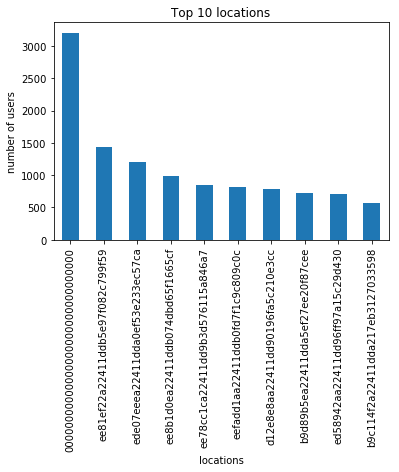

In [4]:
%matplotlib inline
top10.plot(kind='bar', title="Top 10 locations")
plt.ylabel('number of users')
plt.xlabel('locations')

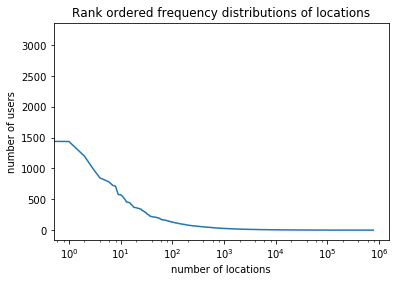

In [5]:
# converting ranked checkins np array to list
ranks = list(checkins_ranked.values)
plt.xscale('log')
plt.title('Rank ordered frequency distributions of locations')
plt.xlabel('number of locations')
plt.ylabel('number of users')
plt.plot(ranks)
plt.show()

#### Fold Location-User Network

Construct an unweighted and undirected two-mode network of brightkite users and locations. A user and a location are connected if the user checked-in at the location at least once. Compute the degree of each location in the two-mode network and list the top 10 location-ids with their corresponding degree. Make a plot that shows the ranked locations (x-axis) and their degree (y-axis).

Fold the two-mode network and construct a location network. Since folding the full network is very slow, select only locations where at least 10 users checked in.

What are the most central locations in the one-mode network and what does that mean? 
Use different centrality measures and order nodes by these centralities and print the top 10 nodes for each measure. Discuss for each centrality measure what it does and how you can interpret the results. For example, what does it mean that location X has the highest betweeness centrality? How is location X different from location Y which has the highest degree centrality?
<font color="red">(3 Points)</font>

In [6]:
def locations_with_more_than(n):
    check_df = pd.DataFrame({
        'location_id':checkins_ranked.index,
        'rank':checkins_ranked.values})
    check_df = check_df[check_df['rank'] > n]
    return check_df.location_id.values
    

In [7]:
columns = ['user', 'location_id']
# reducing checkin df to two columns as df1
df1 = pd.DataFrame(checkins, columns=columns)
# removing locations with les than n=20 checkins because of processing power 
df1 = df1[df1['location_id'].isin(locations_with_more_than(20))]
len(df1)

1035329

In [8]:
# preparing input parameters
edges = [tuple(x) for x in df1.to_records(index=False)]
users = df1.user.values
locations = df1.location_id.values

In [9]:
# creating bipartite graph
B = nx.Graph()
B.add_nodes_from(users, bipartite=0)
B.add_nodes_from(locations, bipartite=1)
B.add_edges_from(edges)

In [10]:
location_degrees = B.degree(df1.location_id)
location_degrees_sorted = sorted(location_degrees.items(), key=lambda x: x[1], reverse=True)
#listing to 10 locations by degree
top10 = location_degrees_sorted[:10]

In [11]:
top10 = pd.DataFrame(top10, columns=['location_id', 'degree'])
top10

,location_id,degree
0,00000000000000000000000000000000,3204
1,ee81ef22a22411ddb5e97f082c799f59,1437
2,ede07eeea22411dda0ef53e233ec57ca,1199
3,ee8b1d0ea22411ddb074dbd65f1665cf,983
4,ee78cc1ca22411dd9b3d576115a846a7,846
5,eefadd1aa22411ddb0fd7f1c9c809c0c,811
6,d12e8e8aa22411dd90196fa5c210e3cc,779
7,b9d89b5ea22411dda5ef27ee20f87cee,728
8,ed58942aa22411dd96ff97a15c29d430,710
9,b9c114f2a22411dda217eb3127033598,576


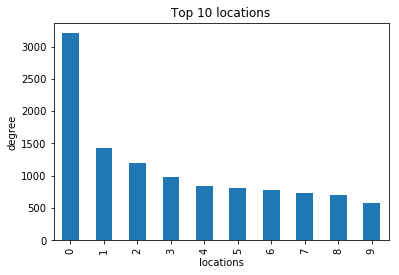

In [12]:
%matplotlib inline
top10.plot(kind='bar', title="Top 10 locations")
plt.ylabel('degree')
plt.legend().set_visible(False)
plt.xlabel('locations')
plt.show()


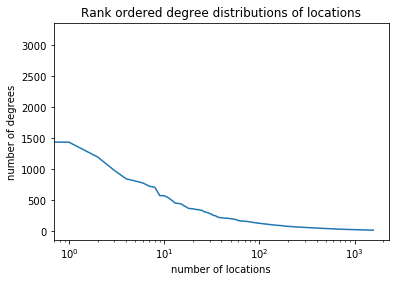

In [13]:
ranks = [i[1] for i in location_degrees_sorted]
plt.xscale('log')
plt.title('Rank ordered degree distributions of locations')
plt.xlabel('number of locations')
plt.ylabel('number of degrees')
plt.plot(ranks)
plt.show()

In [14]:
loc_nodes = [i[0] for i in location_degrees_sorted]

In [15]:
#folding graph
G = bipartite.projected_graph(B, loc_nodes)
G.number_of_nodes()

1574

In [16]:
#top 10 locations by degree centrality
degree_centrality = nx.degree_centrality(G)
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('00000000000000000000000000000000', 0.9281627463445645),
 ('ee81ef22a22411ddb5e97f082c799f59', 0.8569612205975843),
 ('ede07eeea22411dda0ef53e233ec57ca', 0.8099173553719008),
 ('ee8b1d0ea22411ddb074dbd65f1665cf', 0.7285441830896376),
 ('ee78cc1ca22411dd9b3d576115a846a7', 0.7082008900190718),
 ('ed58942aa22411dd96ff97a15c29d430', 0.6916719643992372),
 ('eefadd1aa22411ddb0fd7f1c9c809c0c', 0.684043229497775),
 ('be2f1e669cc111dd9a50003048c0801e', 0.6706929434202161),
 ('ecbfba0ca22411ddb71dfb65ad521832', 0.6592498410680229),
 ('ed6d581aa22411dd89878ff3d9a3a80d', 0.6458995549904641)]

**Degree centrality**  is defined as the number of links incident upon a node (i.e., the number of ties that a node has). In our case, location **'000...'** has the largest degree centrality, therefore it has the most links to other locations in our one-fold network. This means that users that checked in here, checked into many other locations. For location **'ed6...'** we could clame the same, but as the degree centrality is larger for location **'000...'** we know that users who checked in there checked in to more different locations, then the users who checked into location **'ed6...'**.

In [17]:
#top 10 locations by betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G,k=1000)
sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('00000000000000000000000000000000', 0.07798915057067354),
 ('ee81ef22a22411ddb5e97f082c799f59', 0.03820788456581444),
 ('ede07eeea22411dda0ef53e233ec57ca', 0.0293878278151797),
 ('d12e8e8aa22411dd90196fa5c210e3cc', 0.014167148314570386),
 ('be2f1e669cc111dd9a50003048c0801e', 0.013889553210975082),
 ('ed6d581aa22411dd89878ff3d9a3a80d', 0.012335568173837947),
 ('ee8b1d0ea22411ddb074dbd65f1665cf', 0.011318945051129252),
 ('ee78cc1ca22411dd9b3d576115a846a7', 0.011154822749126575),
 ('ed58942aa22411dd96ff97a15c29d430', 0.010530631443914059),
 ('eefadd1aa22411ddb0fd7f1c9c809c0c', 0.01032992842861216)]

**Betweenness centrality** quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. In this one-fold network, location **'000...'** has the highest betweenness centrality, and it is also much bigger then for the other locations. This means that in most cases, it will be on the shortest path from one location to the other. It could mean that this location connects users that usually don't visit the same locations (example: user A never goes to MC donalds, but often visits KFC,on the other hand, person B goes to MC donalds, but never to KFC, but they vere both at location '000...')

In [18]:
#top 10 locations by closenness centrality
closeness_centrality = nx.closeness_centrality(G)
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('00000000000000000000000000000000', 0.9329774614472124),
 ('ee81ef22a22411ddb5e97f082c799f59', 0.874860956618465),
 ('ede07eeea22411dda0ef53e233ec57ca', 0.8402777777777778),
 ('ee8b1d0ea22411ddb074dbd65f1665cf', 0.7865),
 ('ee78cc1ca22411dd9b3d576115a846a7', 0.7741141732283464),
 ('ed58942aa22411dd96ff97a15c29d430', 0.7643343051506317),
 ('eefadd1aa22411ddb0fd7f1c9c809c0c', 0.759903381642512),
 ('be2f1e669cc111dd9a50003048c0801e', 0.7522716403634625),
 ('ecbfba0ca22411ddb71dfb65ad521832', 0.7458511142721669),
 ('ed6d581aa22411dd89878ff3d9a3a80d', 0.7384976525821596)]

 **Closeness centrality** is calculated as the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes. Again, **'000...'** has the largest value, in this case it is for closeness centrality. This means that most of the other locations are close to it (in network terms) which again means that people who checked in this location visited many other locations. Location **'be2...'** has a lower closeness centrality, and it is also close to many locations, but not as many as  **'000...'**. 

Centrality measures definitions were taken from this [Wikipedia article](https://en.wikipedia.org/wiki/Centrality)

#### Entropy of Location Popularity Distribution

How evenly distributed is the attention of brightkite users towards locations? The attention a location receives is measured by the number of distinct users who checked in at this loction. Compute the normalized entropy of the degree distribution. The degree of a location corresponds to the number of distinct users who checked in there.

To that end, you want to have one vector where each element corresponds to a distinct location. The values for each element are then determined by the number of distinct users that have checked-in at that location. Then, calculate normalized entropy for this vector.

Assume we ignore all locations where 0-1 different people checked in. That means we make the long tail of the degree distribution shorter. How would the entropy change? <font color="red">(3 Points)</font>

In [19]:
# since the degree coresponds to the number of distinct users,
# we can use checkins_ranked series because it contains number of distinct checkins per location
locations = checkins_ranked.index.values
user_checkins = checkins_ranked.values
df_ranked = pd.DataFrame({
    'locations': locations,
    'checkins': user_checkins,
})

In [20]:
def normalized_entropy(values):
    return stats.entropy(values)/math.log(len(values))

In [21]:
normalized_entropy(df_ranked.checkins.values)

0.96635800683582673

As the normalised entropy is close to 1, we can say that the attention of users to different locations is not equaly distributed.

In [22]:
ignore_0_1 = df_ranked[df_ranked['checkins'] > 1]
normalized_entropy(ignore_0_1.checkins.values)

0.93904291667351902

As the normalized entropy is a bit lower, which makes the distribution a bit more equal.

#### Describe Location Popularity Distribution

In how many distinct locations did users check in on average in brightkite? 
Create a boxplot that shows the distribution of the number of distinct checkin-locations per user. What is the mean and the variance of this distribution? Compute X for the following statement: Half of the users checked in in more than X locations?  <font color="red">(2 Points)</font>

In [23]:
no_duplicates = checkins.drop_duplicates()
# performing agregation and storing it into a series
checkins_per_user = no_duplicates.groupby(['user'])['location_id'].nunique().sort_values(ascending=False)

In [24]:
#converting series to dataframe
users = checkins_per_user.index.values
locations = checkins_per_user.values

checkins_per_user = pd.DataFrame({
    'num_locations': locations,
    'user_id': users,
})

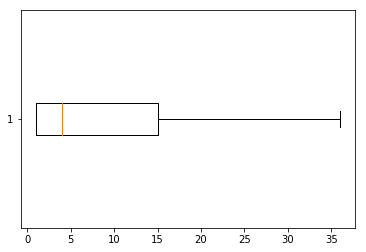

In [25]:
#ploting with outliers removed
%matplotlib inline
plt.figure()
plt.boxplot(list(checkins_per_user.num_locations.values),vert=False,showfliers=False)
plt.show()

From this plot we can see that the median is a bit lower than 5, which means hald of the users did not
visit more than 4 locations. Also, as the outliers are removed, from the plot, we can see that it is not 
very common to visit more than 35 places.

In [26]:
print("mean: ", checkins_per_user.num_locations.mean())
print("variance: ", checkins_per_user.num_locations.var())
print("median or the X value: ", checkins_per_user.num_locations.median())

mean:  20.93469633894876
variance:  2861.432774551248
median or the X value:  4.0


From these numbers, we can infere that the distribution is left skewed, meaning that at least one half of the users have
a value of visits below the average. 

#### Describe Social Network

Load the full Brightkite social network (loc-brightkite_edges.txt.gz). Describe the network.

Some ideas on what you could report: What's the number of nodes, edges and average degree of a node?  What is the size of the largest maximal clique in the network? How well connected is the network? <font color="red">(2 Points)</font>

In [27]:
#loading dataset
friendships = pd.read_csv("Brightkite_edges.txt",sep="\t", names=['user_a', 'user_b'])
#creating list with touples representing edges
edges = [tuple(x) for x in friendships.to_records(index=False)]

In [28]:
# creating graph
G = nx.Graph()
G.add_edges_from(edges)

In [29]:
# number of nodes
print("Number of nodes:",G.number_of_nodes())

Number of nodes: 58228


In [30]:
print("Number of edges:",G.number_of_edges())

Number of edges: 214078


In [31]:
degree_dict = G.degree()
degree_list = degree_dict.values()
avg_node_degree = sc.mean(list(degree_list))
print("Average degree of a node:",round(avg_node_degree,3))

Average degree of a node: 7.353


In [32]:
nx.graph_clique_number(G)

37

This means the largest clique in the graph has 37 nodes. In other words, in this clique, every user knows the other 36 users.

In [33]:
nx.node_connectivity(G)

0

As the node connectivity is 0 it means that no nodes should be removed in order to disconnect the graph. 
Therefore, the graph is not connected.

In [34]:
np.amin(list(degree_list))

1

This is because the lowest degree is 1, which means that groups divided from the rest of the graph exist.

In [35]:
def vertex_edge_ratio(v,e):
    return v/e 

In [36]:
vertex_edge_ratio(nx.number_of_nodes(G), nx.number_of_edges(G))

0.27199431982735267

For every node we have close to 3 edges.

In [37]:
sc.median(list(degree_list))

2.0

Half of nodes have a degree lower than two, and on average around 7.

In [38]:
def edges_needed(n):
    return (n-1)*(n-2)/2+1

In [39]:
edges_needed(nx.number_of_nodes(G))>nx.number_of_edges(G)

True

Since the needed number of edges is much larger than the number of edges in this graph, and taking into account the above said we can claim the graph is not so well connected. 

#### Draw Social Network

Select the top location (i.e., the location where most distinct brightkite user checked in) and filter the brightkite social network (i.e., Brightkite_edges.txt) so that it only contains users (nodes) which checked in at the top location.
Load this subpart of the social networks into python (using the NetworkX library)
Plot the sub-network in an appealing way. <font color="red">(3 Points)</font>

In [40]:
users_at_pop = df1[df1['location_id'] =='00000000000000000000000000000000']
users_at_pop = users_at_pop.drop_duplicates()

In [41]:
nodes = users_at_pop.user.values
len(nodes)

3204

In [42]:
friendships_small = friendships[friendships.user_a.isin(nodes)]
friendships_small = friendships_small[friendships_small.user_b.isin(nodes)]  

In [43]:
edges_small = [tuple(x) for x in friendships_small.to_records(index=False)]

In [44]:
LG = nx.Graph()
LG.add_nodes_from(nodes)
LG.add_edges_from(edges_small)

In [45]:
print("Number of nodes:",LG.number_of_nodes())
print("Number of edges:",LG.number_of_edges())

Number of nodes: 3204
Number of edges: 20096


This is what the graph looks like when we take into account all the unique users who checked into the top location

C:\Users\Latitude E7450\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

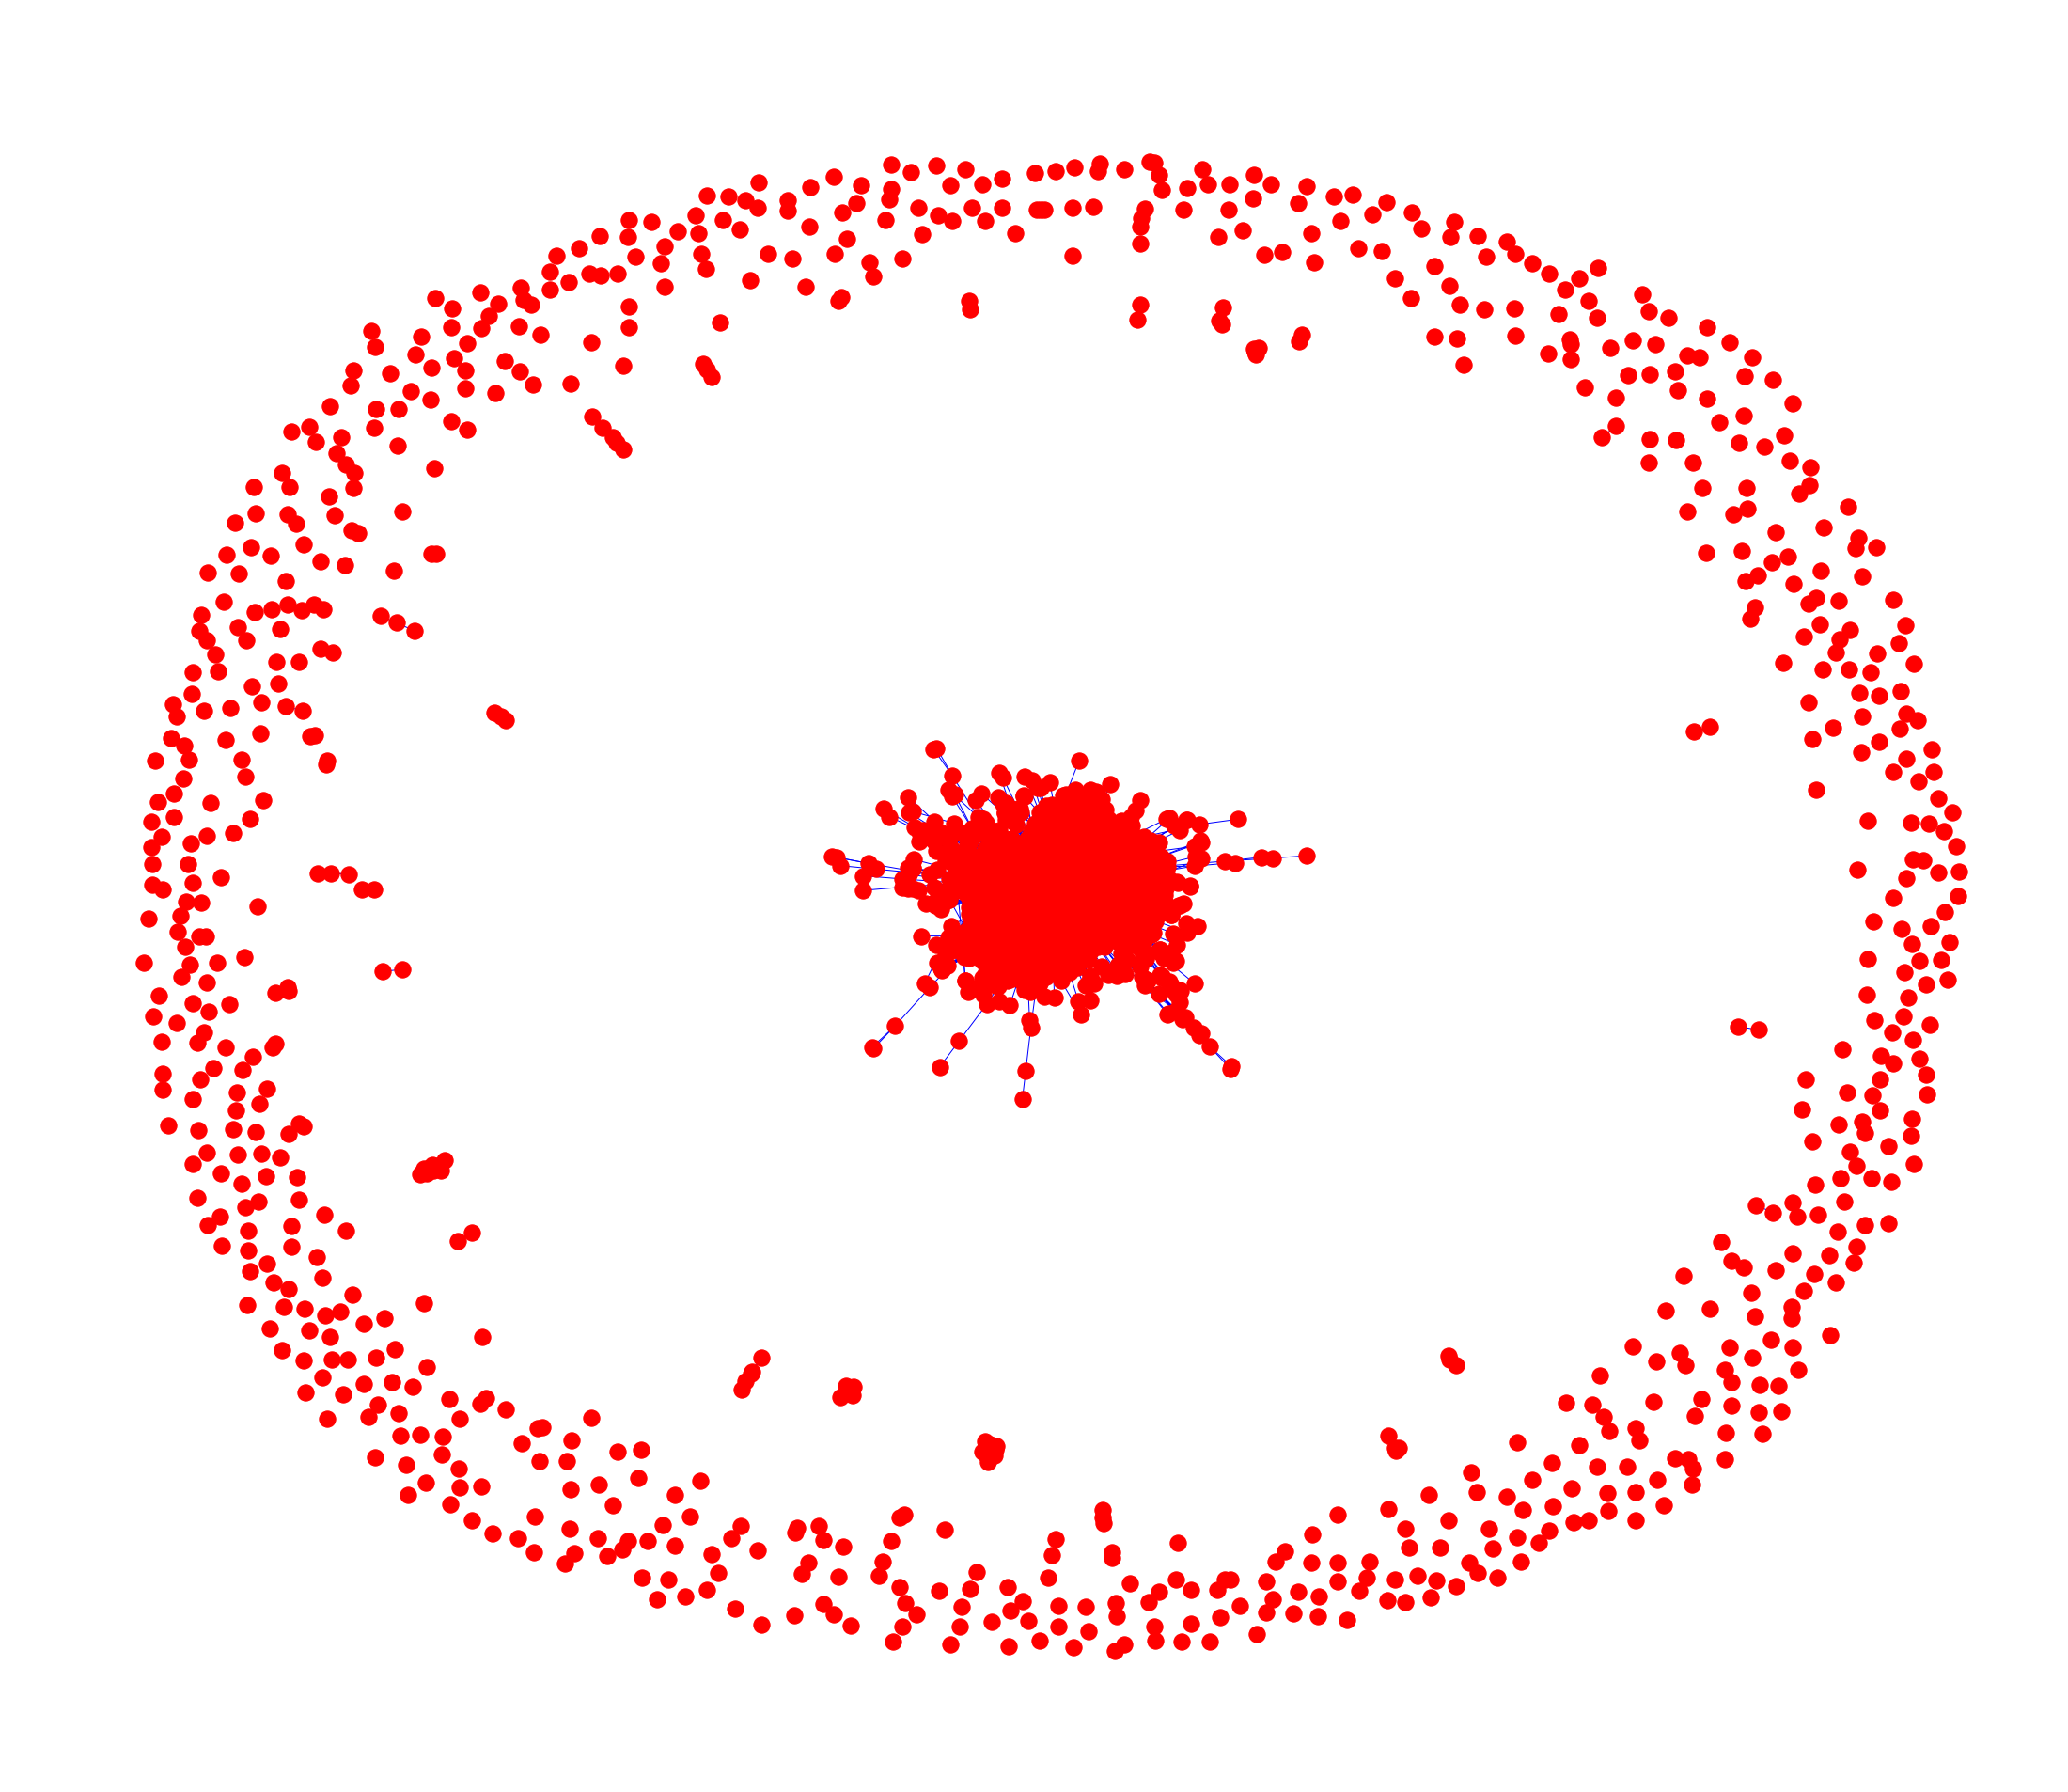

In [46]:
%matplotlib inline
plt.figure(figsize=(30, 26))
nx.draw(LG,edge_color='b')

In [47]:
LG = nx.Graph()
LG.add_edges_from(edges_small)

In [48]:
print("Number of nodes:",LG.number_of_nodes())
print("Number of edges:",LG.number_of_edges())

Number of nodes: 2481
Number of edges: 20096


This is what the graph looks like when we take into account all the unique users who checked into the top location and have at least on friend who also did it

C:\Users\Latitude E7450\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

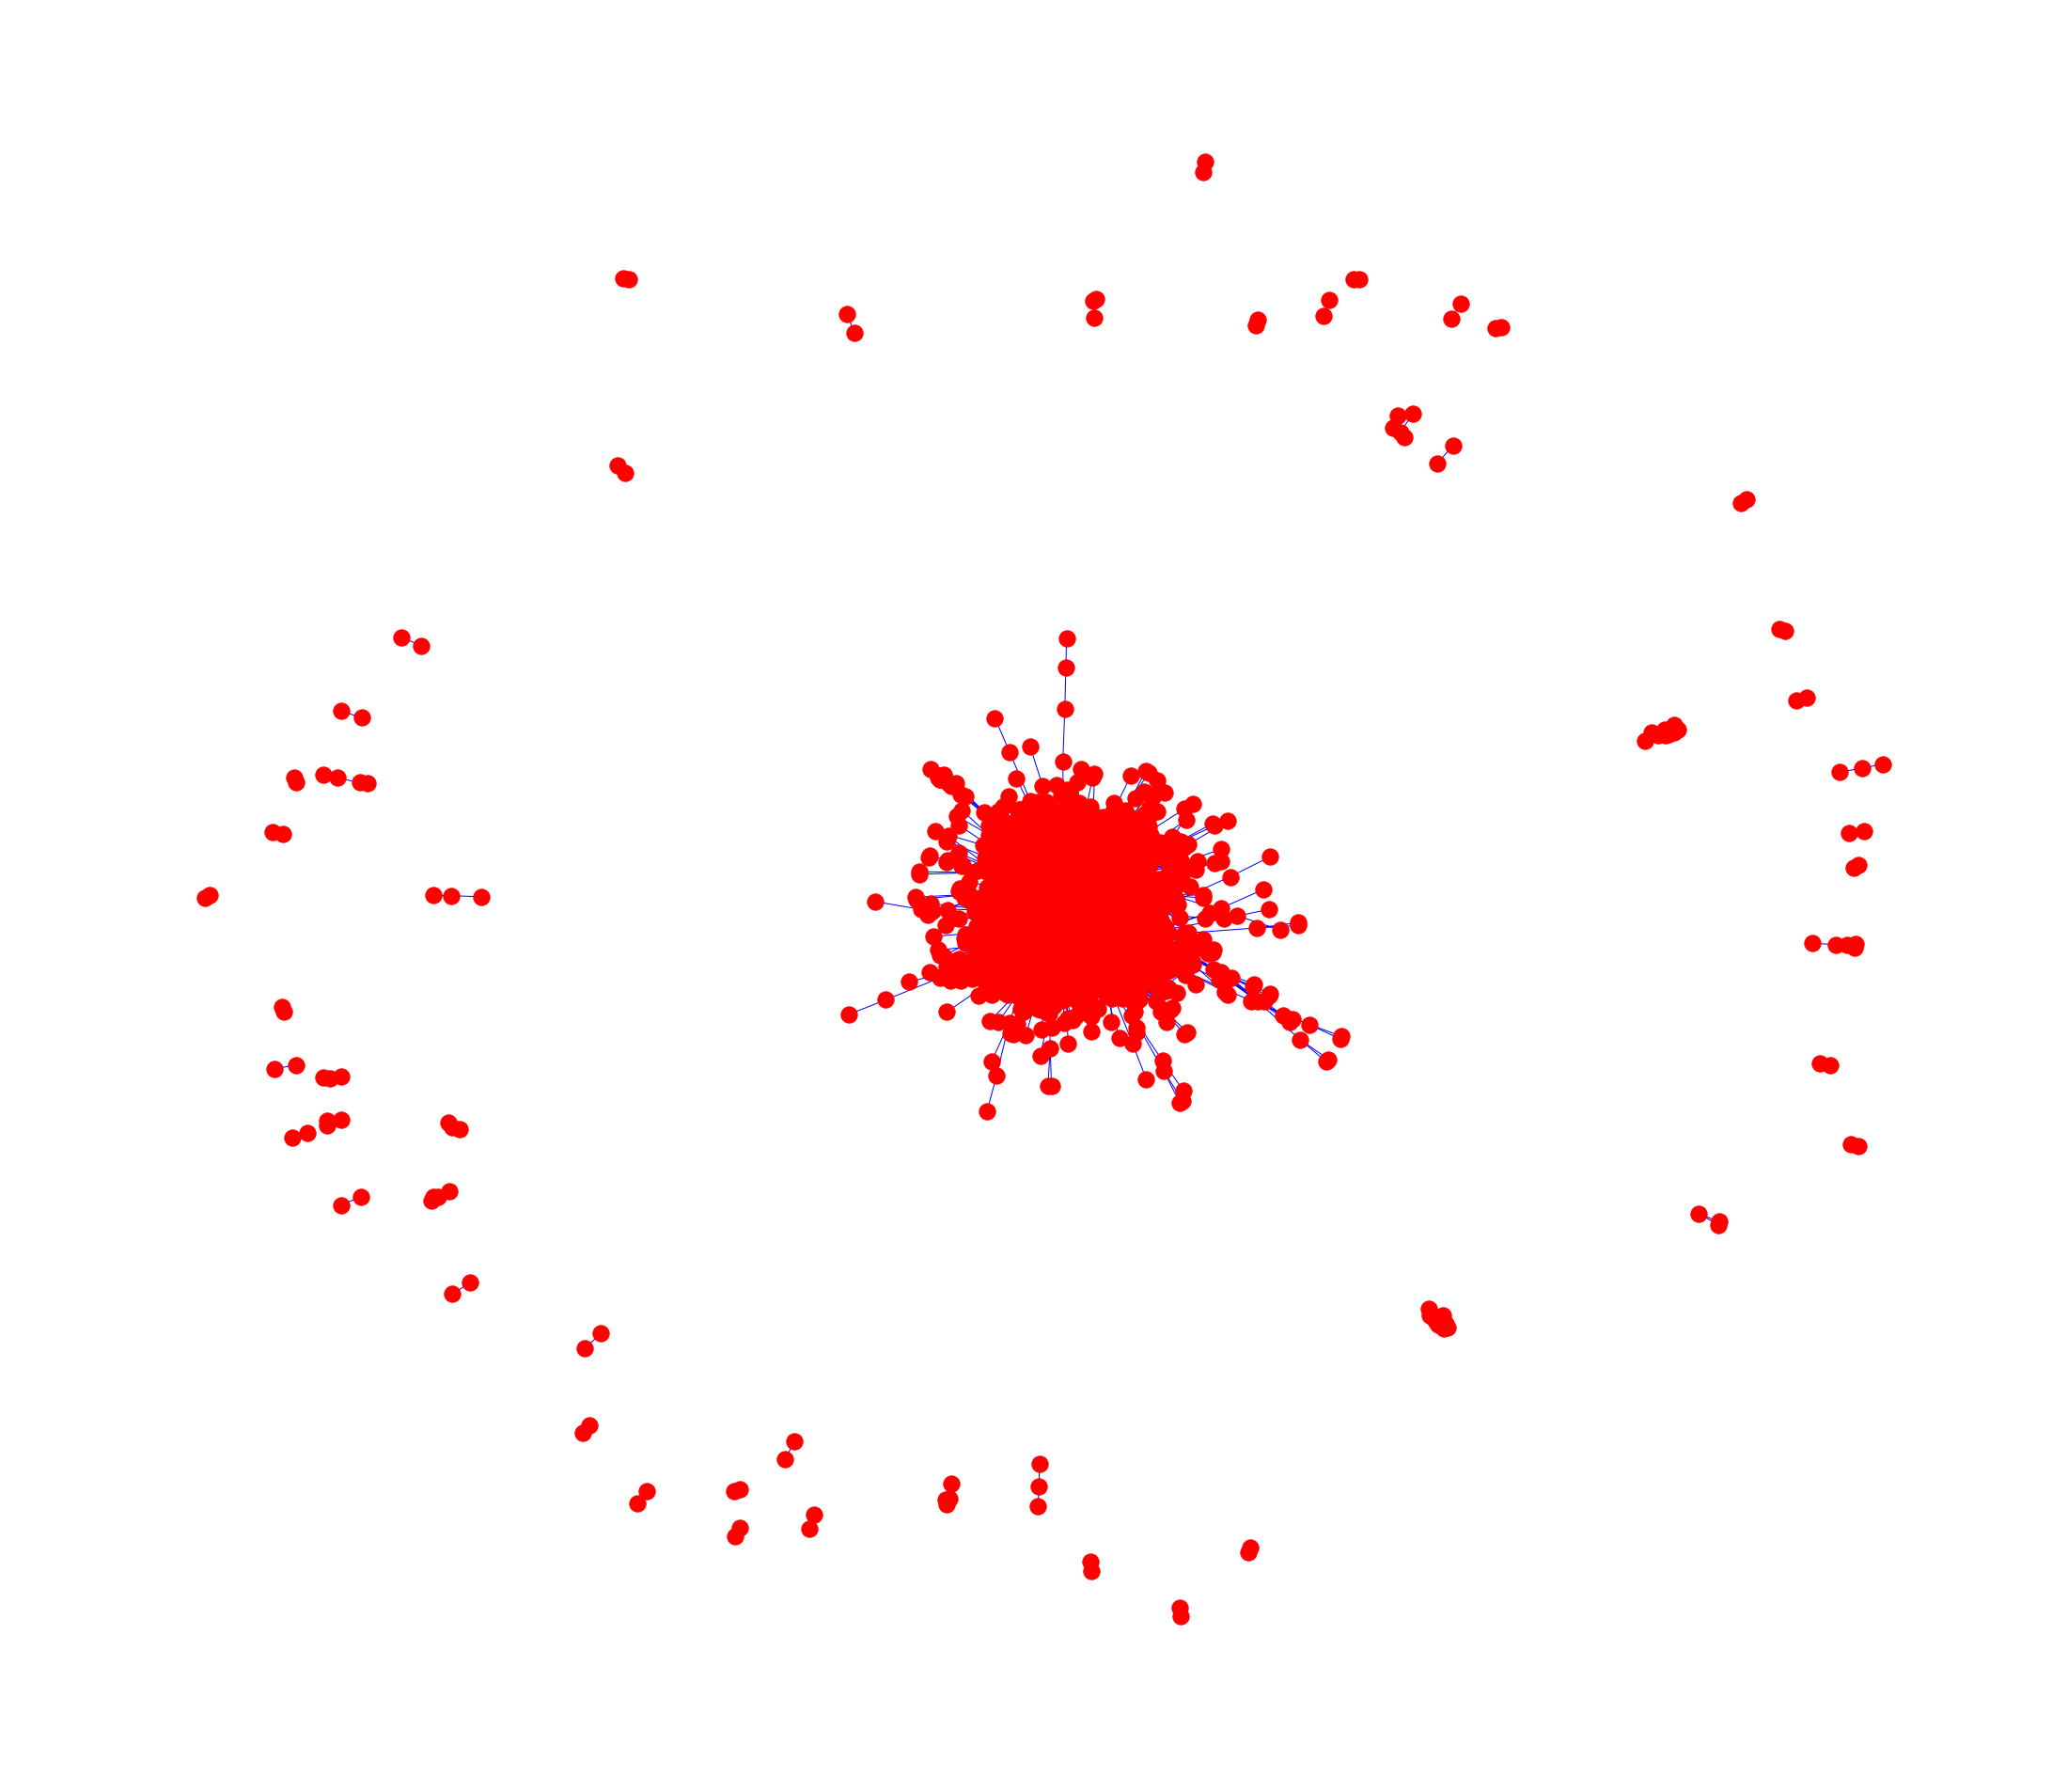

In [49]:
%matplotlib inline
plt.figure(figsize=(30, 26))
nx.draw(LG,edge_color='b')

In [50]:
LG = nx.Graph()
LG.add_edges_from(edges_small)
loners = []
for k,v in LG.degree().items():
    if v < 11:
        loners.append(k)
LG.remove_nodes_from(loners)

In [51]:
print("Number of nodes:",LG.number_of_nodes())
print("Number of edges:",LG.number_of_edges())

Number of nodes: 721
Number of edges: 15785


This is what the graph looks like when we take into account all the unique users who checked into the
top location and have at 10 friends who also did it

C:\Users\Latitude E7450\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Latitude E7450\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

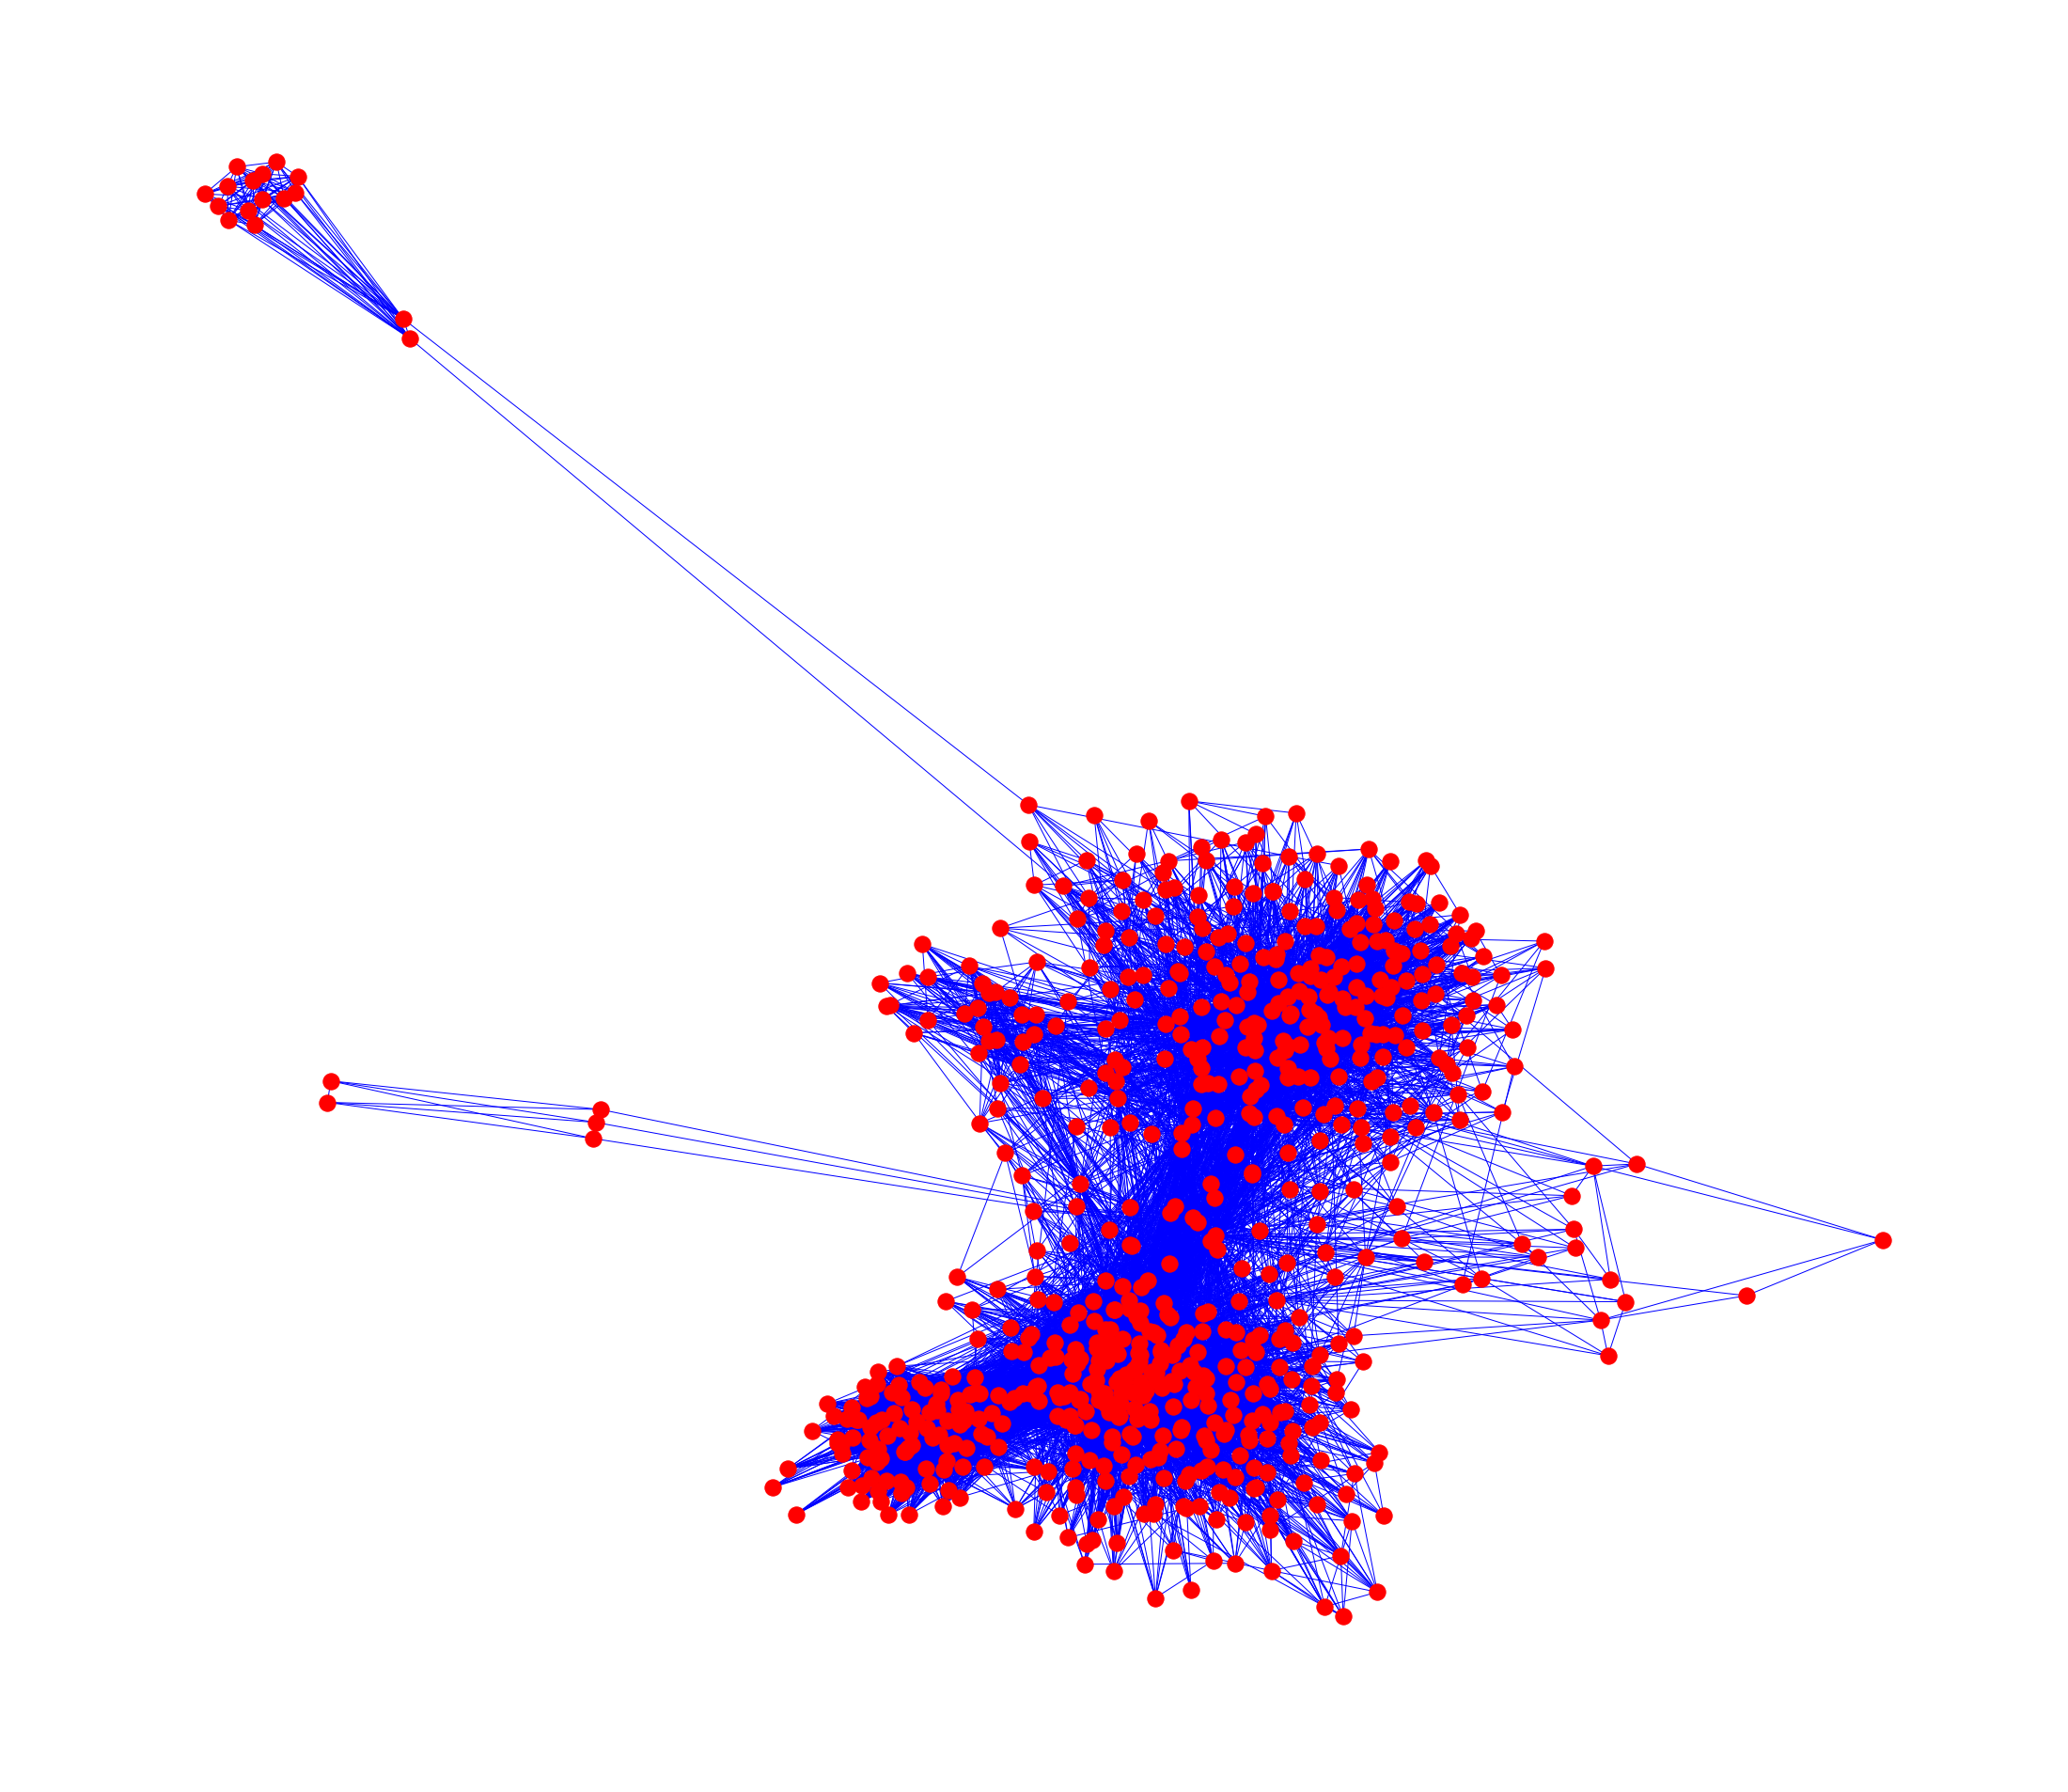

In [52]:
%matplotlib inline
plt.figure(figsize=(30, 26))
nx.draw(LG,edge_color='b')